<a href="https://colab.research.google.com/github/dellaanima/AIFFEL_QUEST/blob/master/DLBasic/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# cifar10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 훈련 데이터를 훈련 데이터와 검증 데이터로 분리 (20%를 검증 데이터로 설정)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류의 개수 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [ ]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

<ipython-input-4-6d8a43ba86bc>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


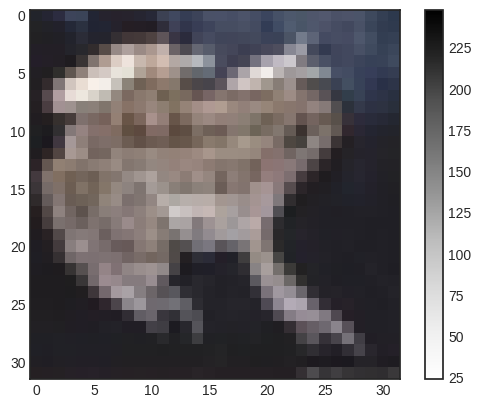

In [ ]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# 훈련, 검증, 테스트 데이터의 형태(shape) 변형
x_train = x_train.reshape(x_train.shape[0], 32 * 32 * 3)
x_val = x_val.reshape(x_val.shape[0], 32 * 32 * 3)
x_test = x_test.reshape(x_test.shape[0], 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)



(40000, 3072)
(10000, 3072)
(10000, 3072)


In [ ]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [18]:
from tensorflow.keras import models, layers

# 신경망 모델 구성 ( BatchNormalization과 Dropout 적용)
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(3072,)))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Dropout(0.5))          # Dropout 추가
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())  # BatchNormalization 추가
model.add(layers.Dropout(0.5))          # Dropout 추가
model.add(layers.Dense(10, activation='softmax'))  # 10개의 클래스를 분류하는 출력층

# 모델 컴파일
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 구조 확인
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               393344    
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 128)              

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ModelCheckpoint 콜백 설정
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

# 모델 학습
history = model.fit(x_train, y_train, epochs=100, batch_size=512, validation_data=(x_val, y_val), callbacks=[model_checkpoint, early_stopping])


Epoch 1/100
79/79 [==============================] - 4s 53ms/step - loss: 1.7323 - accuracy: 0.3805 - val_loss: 1.7288 - val_accuracy: 0.3799
Epoch 2/100
79/79 [==============================] - 3s 38ms/step - loss: 1.7296 - accuracy: 0.3794 - val_loss: 1.8987 - val_accuracy: 0.3413
Epoch 3/100
79/79 [==============================] - 4s 45ms/step - loss: 1.7314 - accuracy: 0.3830 - val_loss: 1.7619 - val_accuracy: 0.3586
Epoch 4/100
79/79 [==============================] - 3s 44ms/step - loss: 1.7282 - accuracy: 0.3833 - val_loss: 1.8664 - val_accuracy: 0.3110
Epoch 5/100
79/79 [==============================] - 3s 37ms/step - loss: 1.7247 - accuracy: 0.3850 - val_loss: 1.7995 - val_accuracy: 0.3620
Epoch 6/100
79/79 [==============================] - 3s 36ms/step - loss: 1.7211 - accuracy: 0.3852 - val_loss: 1.6831 - val_accuracy: 0.3775
Epoch 7/100
79/79 [==============================] - 4s 46ms/step - loss: 1.7181 - accuracy: 0.3889 - val_loss: 1.6765 - val_accuracy: 0.3956
Epoch 

<ipython-input-24-ef4da0309378>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


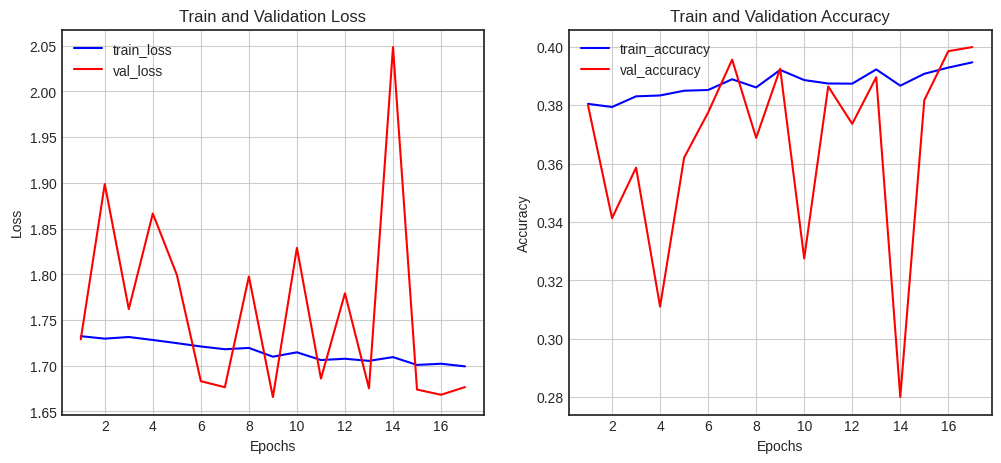

In [24]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6706 - accuracy: 0.3883


[1.6705530881881714, 0.38830000162124634]